# K Nearest Neighbors Regression

This workbook was actually created after I completed the assignments for K-NN in the Coursera Machine Learning Specialization Regression course, Week 6.  This workbook is to reinforce some of the learning, dive deeper into some examples, and provide some extra visualization that lacked in the assignments.

Much like the other workbooks I've created up to this point, the point of this workbook is to create a line and add fake noise, but then solve for the true line using K Nearest Neighbor Regression. 

In [128]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: K-NN with straight average

### As usual, lets start by creating some fake data to fit

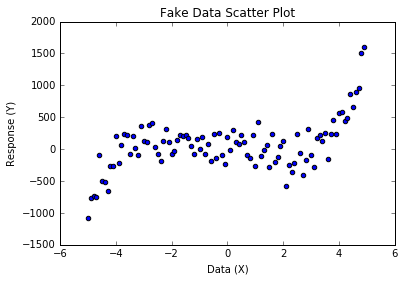

In [129]:
#### CREATE FAKE DATA

# simulate some data
column1 = np.repeat(1, 100)
column2 = np.arange(-5,5,.1)
column3 = column2**2
column4 = column2**3
column5 = column2**4
column6 = column2**5
X = np.array([column1,column2,column3,column4,column5,column6])
X = X.transpose()
# make up some parameters
B = np.array(np.array([0.345,-90.961,-1.109,0.432,0.657,0.548]))
B = B.transpose()
# create some fake noise
e = np.array(np.random.normal(0, 200, 100))
e = e.transpose()
# finally, create fake response data
Y = np.add(np.dot(X,B), e)

# plot our fake data to make sure it looks as we would expect (linear relationship with noise)
plt.scatter(X[:,1], Y)
plt.title('Fake Data Scatter Plot')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

### Now let's create some data we want to make predictions on

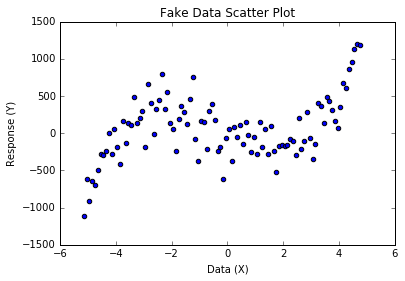

In [130]:
#### CREATE FAKE DATA

# simulate some data
column1 = np.repeat(1, 100)
column2 = np.arange(-5.15,4.85,.1)
column3 = column2**2
column4 = column2**3
column5 = column2**4
column6 = column2**5
Xval = np.array([column1,column2,column3,column4,column5,column6])
Xval = Xval.transpose()
# make up some parameters
B = np.array(np.array([0.345,-90.961,-1.109,0.432,0.657,0.548]))
B = B.transpose()
# create some fake noise
e = np.array(np.random.normal(0, 200, 100))
e = e.transpose()
# finally, create fake response data
Yval = np.add(np.dot(Xval,B), e)

# plot our fake data to make sure it looks as we would expect (linear relationship with noise)
plt.scatter(Xval[:,1], Yval)
plt.title('Fake Data Scatter Plot')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

### Check that our datasets are not exactly the same

In [131]:
print(X[1])
print(Xval[1])

[  1.00000000e+00  -4.90000000e+00   2.40100000e+01  -1.17649000e+02
   5.76480100e+02  -2.82475249e+03]
[  1.00000000e+00  -5.05000000e+00   2.55025000e+01  -1.28787625e+02
   6.50377506e+02  -3.28440641e+03]


### Function for computing the euclidean distance between an array and many arrays

In [132]:
def compute_distances(features_instances, features_query):
    distances = np.sqrt(np.sum((features_instances - features_query)**2, axis=1))
    return distances

### Fuction for finding the k nearest neighbors between our array and all other arrays

In [133]:
def k_nearest_neighbors(k, features_instances, features_query):
    distances = compute_distances(features_instances=features_instances, features_query=features_query)
    neighbors = np.argsort(distances)[0:k]
    return neighbors

### Function for making prediction on array by finding the k nearest neighbors and then taking the average response for those k neighbors

In [134]:
def predict_output(k, features_instances, output_instances, features_query):
    N = len(features_query[:,1])
    predictions = np.zeros(N)
    for i in range(N):
        neighbors = k_nearest_neighbors(k=k, 
                                        features_instances=features_instances, 
                                        features_query=features_query[i])
        neighbor_values = np.take(output_instances, list(neighbors))
        prediction = np.average(neighbor_values)
        predictions[i] = prediction
    return predictions

### Compute and plot K Nearest Neighbor fit, using K=10

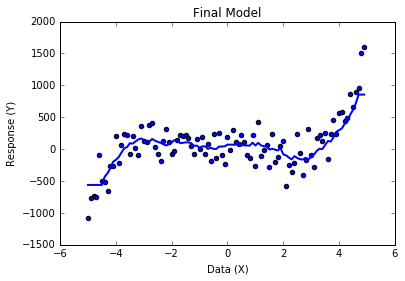

In [135]:
predictions = predict_output(k=10, features_instances=X, output_instances=Y, features_query=Xval)

# plot data and final model
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], predictions, linewidth=2.0)
plt.title('Final Model')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

### Compute and plot K Nearest Neighbor fit, using K=20

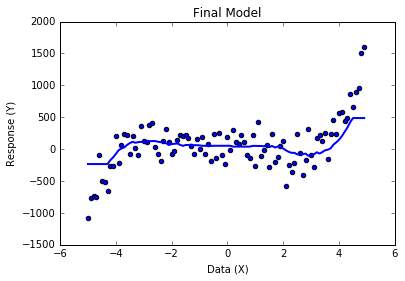

In [136]:
predictions = predict_output(k=20, features_instances=X, output_instances=Y, features_query=Xval)

# plot data and final model
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], predictions, linewidth=2.0)
plt.title('Final Model')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

### Compute and plot K Nearest Neighbor fit, using K=5

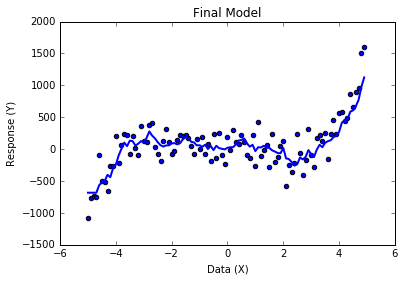

In [137]:
predictions = predict_output(k=5, features_instances=X, output_instances=Y, features_query=Xval)

# plot data and final model
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], predictions, linewidth=2.0)
plt.title('Final Model')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

## Part 2: K-NN with weighted average

### This time we want this function to not only return the neighbors, but also the distances for later on

In [213]:
def k_nearest_neighbors_weighted(k, features_instances, features_query):
    distances = compute_distances(features_instances=features_instances, features_query=features_query)
    neighbors = np.argsort(distances)[0:k]
    return neighbors, distances

### Now we compute K-NN using weight average via Gaussian kernel

To compute the gaussian kernel we'll be using the formula from class:

<img src="https://github.com/yeamusic21/Coursera-Machine-Learning-Specialization-Extra-Assignments/blob/master/Regression/img/gaussian_kernel.PNG?raw=true">

One I problem I had though, was that the distances were so large that once you squared them the value of lambda then needed to be huge to get the values within the exponential to be reasonable otherwise there wouldn't be much separation between the final weights.  To fix this I standardized the distance values to have standard deviation = 1 by dividing by the standard deviation of the distances.  You'll see later on that this gives much more reasonable values on the exponential curve.

##### Here is a bit of a review of what the exponential curve looks like for values -10 to 0

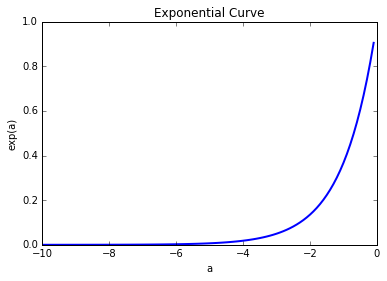

In [350]:
a = np.arange(-10,0,.1)
b = np.exp(a)

# plot data
plt.plot(a, b, linewidth=2.0)
plt.title('Exponential Curve')
plt.xlabel("a")
plt.ylabel("exp(a)")
plt.show()

##### Okay, now lets create our new predict_output_weighted function

In [214]:
def predict_output_weighted(k, knn_lambda, features_instances, output_instances, features_query):
    N = len(features_query[:,1])
    predictions = np.zeros(N)
    for i in range(N):
        (neighbors, distances) = k_nearest_neighbors_weighted(k=k, 
                                                              features_instances=features_instances, 
                                                              features_query=features_query[i])
        neighbor_values = np.take(output_instances, list(neighbors))
        distance_values = np.take(distances, list(neighbors))
        dist_vals_norm = (distance_values)/np.std(distance_values)
        denominator = np.sum(np.exp(-((dist_vals_norm)**2)/knn_lambda))
        numerator = np.multiply(np.exp(-((dist_vals_norm)**2)/knn_lambda),neighbor_values)
        prediction = np.sum(numerator)/denominator
        predictions[i] = prediction
    return predictions

### Compute and plot K Nearest Neighbor fit, using K=18 and lambda=6

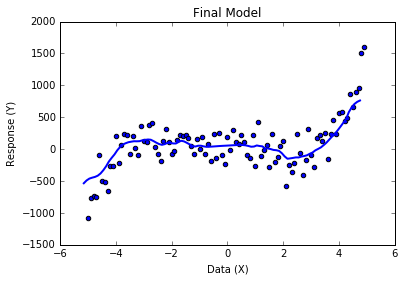

In [343]:
predictions = predict_output_weighted(k=18, knn_lambda=6, features_instances=X, output_instances=Y, features_query=Xval)

# plot data and final model
plt.scatter(X[:,1], Y)
plt.plot(Xval[:,1], predictions, linewidth=2.0)
plt.title('Final Model')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

### Lets take a quick look under the hood

In [344]:
k=18
knn_lambda=6
features_instances=X
output_instances=Y
features_query=Xval

N = len(features_query[:,1])
predictions = np.zeros(N)
for i in range(N):
    (neighbors, distances) = k_nearest_neighbors_weighted(k=k, 
                                                          features_instances=features_instances, 
                                                          features_query=features_query[i])
    neighbor_values = np.take(output_instances, list(neighbors))
    distance_values = np.take(distances, list(neighbors))
    dist_vals_norm = (distance_values)/np.std(distance_values)
    denominator = np.sum(np.exp(-((dist_vals_norm)**2)/knn_lambda))
    numerator = np.multiply(np.exp(-((dist_vals_norm)**2)/knn_lambda),neighbor_values)
    prediction = np.sum(numerator)/denominator
    predictions[i] = prediction

In [345]:
# view the affect of normalization of the distances
print(distance_values)
print(dist_vals_norm)

[  126.43404255   131.83092417   363.7789226    412.37223359   581.50357033
   780.85264313   963.01680662  1129.13394041  1280.2903445   1417.52194619
  1541.81550748  1654.10983302  1755.29697841  1846.22345877  1927.69145762
  2000.46003571  2065.24633978  2122.72681108]
[ 0.18857252  0.1966218   0.54256516  0.6150406   0.86729483  1.16461789
  1.43631018  1.68406882  1.90951399  2.11419073  2.29957079  2.46705435
  2.61797189  2.75358596  2.87509299  2.98362511  3.0802519   3.16598227]


In [346]:
# values on the exponential curve
np.exp(-((dist_vals_norm)**2)/knn_lambda)

array([ 0.99409093,  0.99357736,  0.95212131,  0.93890045,  0.88217333,
        0.79767359,  0.70904864,  0.62332869,  0.54459805,  0.47474993,
        0.41422845,  0.36262253,  0.31908552,  0.28260477,  0.25215954,
        0.22680384,  0.2057023 ,  0.18813905])

In [347]:
# weights
np.exp(-((dist_vals_norm)**2)/knn_lambda)/(denominator)

array([ 0.09782811,  0.09777757,  0.0936979 ,  0.09239684,  0.08681434,
        0.07849875,  0.06977721,  0.06134154,  0.05359369,  0.04671996,
        0.04076406,  0.03568554,  0.03140108,  0.02781103,  0.02481492,
        0.02231968,  0.02024309,  0.01851469])

In [348]:
# weights should sum to 1
sum(np.exp(-((dist_vals_norm)**2)/knn_lambda)/(denominator))

0.99999999999999978

You can really see how the distances are going to be weighted by looking at the values from the exponential curve.  I think K=18 and lambda=6 really shows how the combination of K and lambda work together to provide much smoother results, and by smoother meaning less jagged.  